In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [54]:
def get_N(a,sig,n):
    n=1000
    x=np.arange(0,n)
    i,j=np.meshgrid(x,x)
    N = a*np.exp(-0.5*(i-j)**2/sig**2)+(1-a)*np.eye(n)
    return N

def get_error_bar(a,sig,n):
    x=np.arange(0,n)
    A=np.exp(-0.5*(x-n//2)**2/50**2).reshape(n,1)
    Ninv = np.linalg.inv(get_N(a,sig,n))
    err=np.sqrt(1/(A.T@Ninv@A))
    return err

def get_realization(N,size):
    w,v = np.linalg.eigh(N)
    n=np.sqrt(w)*np.random.randn(size)
    n_new = v@n
    return n_new

In [51]:
errs=np.zeros((3,3))
for i,sig in enumerate((5,50,500)):
    for j,a in enumerate((0.1,0.5,0.9)):
        errs[i,j]=get_error_bar(a,sig,1000)

In [52]:
errs

array([[0.15576335, 0.27599935, 0.35789526],
       [0.3377449 , 0.71405448, 0.94993195],
       [0.12757499, 0.10066392, 0.04892549]])

value for sig=5, and a=0.5 (row 0, col 1) matches Jon's value in the question.

In [45]:
#nominal error for N = identity would be

n=1000
x=np.arange(0,n)
A=np.exp(-0.5*(x-n//2)**2/50**2).reshape(n,1)
print("Error for identity noise mat",np.sqrt(1/np.sum(A**2)))

Error for identity noise mat 0.1062251932027197


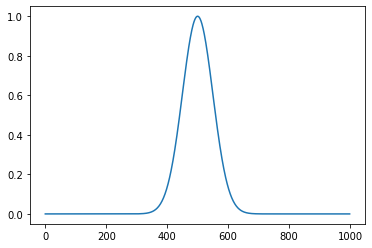

In [47]:
plt.plot(A)

In [94]:
noise=get_realization(get_N(0.8,50,1000),1000)

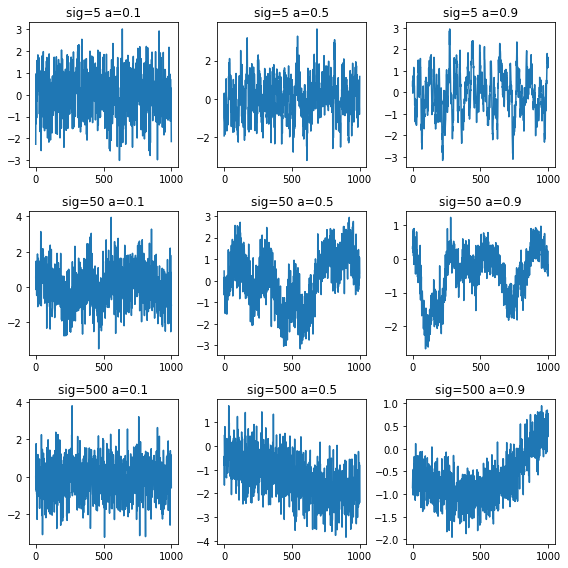

In [102]:
np.random.seed(42)
f=plt.gcf()
f.set_size_inches(8,8)
for i,sig in enumerate((5,50,500)):
    for j,a in enumerate((0.1,0.5,0.9)):
        plt.subplot(3,3,i*3+j+1)
        plt.title(f"sig={sig} a={a}")
        plt.plot(get_realization(get_N(a,sig,1000),1000))
plt.tight_layout()

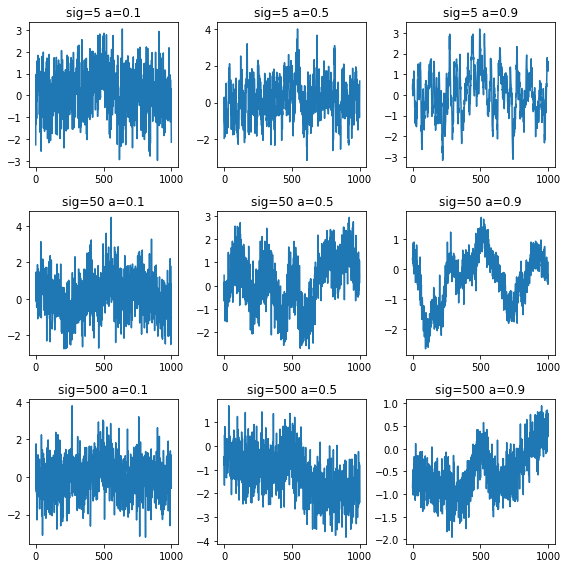

In [103]:
# SAME NOISE AS ABOVE BUT SIGNAL ADDED IN
np.random.seed(42)
f=plt.gcf()
f.set_size_inches(8,8)
for i,sig in enumerate((5,50,500)):
    for j,a in enumerate((0.1,0.5,0.9)):
        plt.subplot(3,3,i*3+j+1)
        plt.title(f"sig={sig} a={a}")
        plt.plot(A.flatten()+get_realization(get_N(a,sig,1000),1000))
plt.tight_layout()

1. When sig=50, and a=0.9, all points are highly correlated over sig=50, which also the sigma of the source. Model has a hard time distinguishing peak/width of signal from peak/width of noise (also 50).
2. When a and sig are both high, all data points are almost fully correlated, but since correlation length is also huge, all pairs of points have roughly the same correlation, signal pops out clearly.

We should clearly be more worried about correlated noise, when it's width is close to width of signal.